# Laborator 1: Segmentare pe histograma - generalitati

## Scopul lucrarii
Scopul acestei lucrari este familiarizarea cu tehnicile fundamentale de segmentare pe histograma a imaginilor,
si anume segmentarea cu mai multe praguri, prin alegerea acestora pe minimele histogramei. Se urmareste calculul histogramei si a histogramei cumulative, ca descriptori ai continutului imaginii.

## 1. Histograma imaginii

Pentru o imagine $f$ de $M\times N$ pixeli si $L$ niveluri de gri, histograma este definita ca probabilitatea de aparitie in imagine a diferitelor niveluri de gri posibile (evident nivelurile de gri sunt numerotate incapand cu 0 si se incheie cu L-1; in cazurile curente evident L=256).
$h(i)=\frac{1}{MN}\sum\limits_{m=0}^{M-1}\sum\limits_{n=0}^{N-1}\delta (i-f(m,n)), i=0,1,...L-1$

Fiind o functie de densitate de probabilitate, histograma oricarei imagini verifica conditia de normare:
$\sum\limits_{i=0}^{L-1}h(i)=1.$

## Imagini disponibile
biscuiti.jpg; pills.jpg; lena_gray.jpeg; boabe-piper.jpg; layers-b-52.jpg; layers-irish-flag.jpg; layers-bob-marley.png

# Ce vom coda:
citirea unei imagini, verificarea tipului acesteia, extragerea planului de luminanta (niveluri de gri), constructia histogramei imaginii, afisarea histogramei

<class 'numpy.ndarray'>
uint8
(720, 1034, 3)


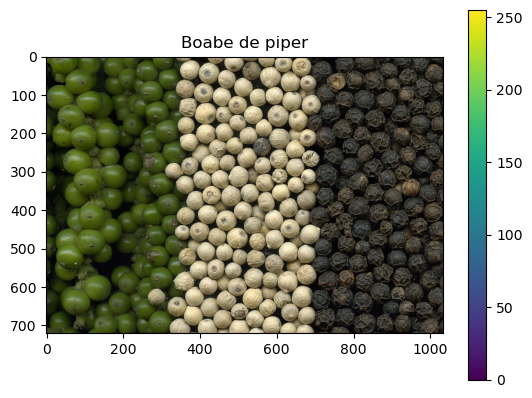

 
<class 'numpy.ndarray'>
uint8
(300, 400)


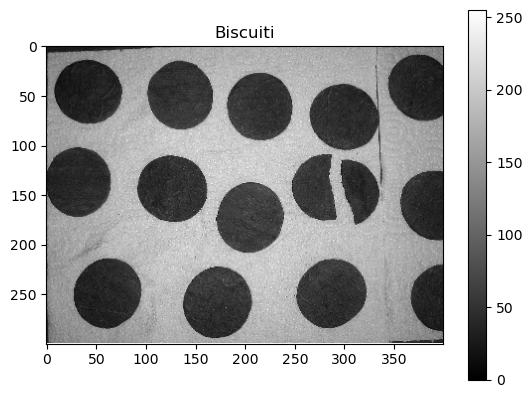

 
<class 'numpy.ndarray'>
uint8
(240, 320, 3)


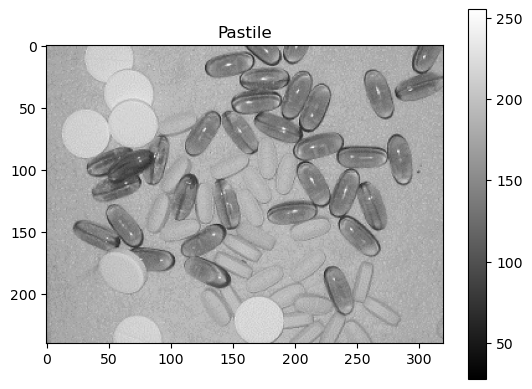

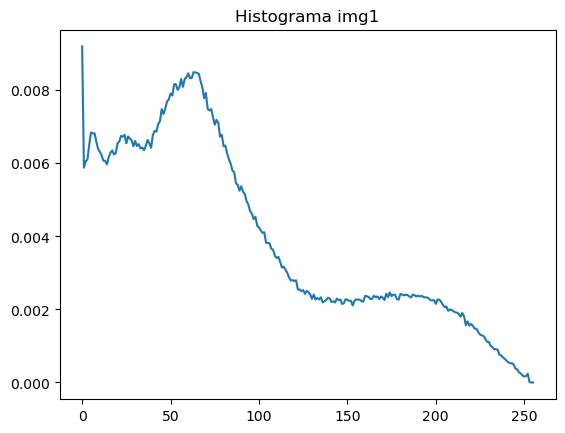

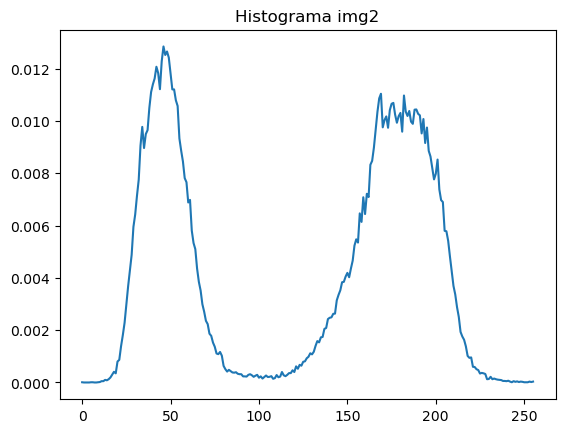

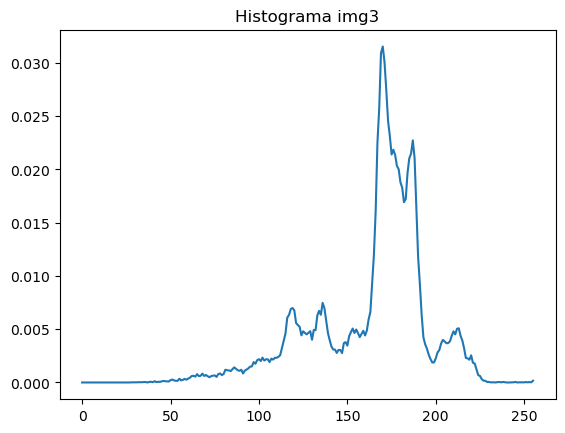

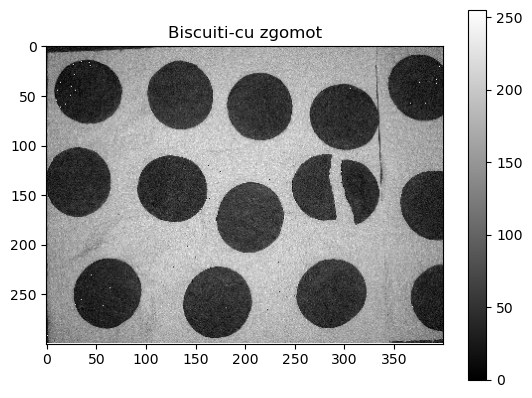

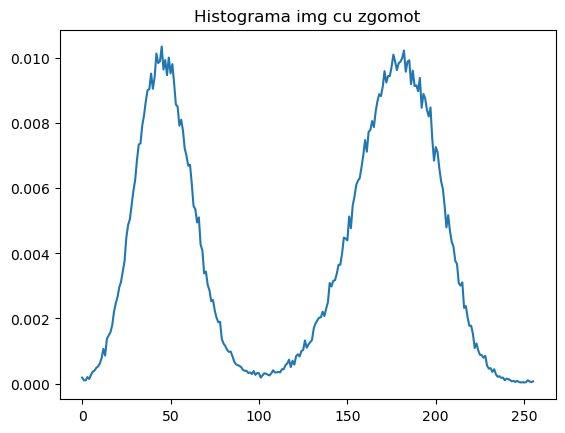

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Histograma img cu zgomot'),
 None)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color

plt.close('all')

#citirea unei imagini
img1 = io.imread('boabe-piper.jpg')   
#verificarea tipului imaginii
print(type(img1))                     
print(img1.dtype)
#verificarea dimensiunii img
print(np.shape(img1))  
#plotare imagine originala              
plt.figure(),plt.imshow(img1),plt.title("Boabe de piper"),plt.colorbar(),plt.show()

img2 = io.imread('biscuiti.jpg')
print(' ')
print(type(img2))
print(img2.dtype)
print(np.shape(img2))
h2,w2=np.shape(img2)
plt.figure(),plt.imshow(img2,cmap="gray"),plt.title("Biscuiti"),plt.colorbar(),plt.show()


img3 = io.imread('pills.jpg')
print(' ')
print(type(img3))
print(img3.dtype)
print(np.shape(img3))    #img alb negru dar are 3 axe
h3,w3=np.shape(img3[:,:,1])
plt.figure(),plt.imshow(img3,cmap="gray"),plt.title("Pastile"),plt.colorbar(),plt.show()


######################### 1)Histograma img ##############################################################



#####histograma
def histograma(h,w,img):
    hist=np.zeros(256)
    for i in range(h):
        for j in range(w):
            hist[img[i,j]]+=1    
    return hist/(h*w)

#histograma pentru img1 (color)
img1=color.rgb2gray(img1)   #transformare din color in alb negru
img1=np.uint8(img1*255)     #transformare din float in uint8
h1,w1=np.shape(img1)
H1=histograma(h1,w1,img1)
plt.figure("Histograma img1"),plt.plot(H1),plt.title("Histograma img1"),plt.show()

#histograma pentru img2
H2=histograma(h2,w2,img2)
plt.figure(),plt.plot(H2),plt.title("Histograma img2"),plt.show()

#histograma pentru img3  (alegem doar doua planuri din cele 3)
H3=histograma(h3,w3,img3[:,:,1])
plt.figure(),plt.plot(H3),plt.title("Histograma img3"),plt.show()


######################### 1.1)Histograma img cu zgomot ######################################################
###pentru img2

#zgomot gaussian
medie=0
disp=10
N1=np.random.normal(medie,disp,(h1,w1))
N2=np.random.normal(medie,disp,(h2,w2))
N3=np.random.normal(medie,disp,(h3,w3))

#adaugam zgomot peste img initiala
img2_zg=img2+N2            #dupa adaugarea zgomotului img devine de tip float
img2_zg=np.uint8(img2_zg)  #din float in uint
plt.figure(),plt.imshow(img2_zg,cmap="gray"),plt.title("Biscuiti-cu zgomot"),plt.colorbar(),plt.show()

#histograma pentru img cu zgomot noua
h2_zg,w2_zg=np.shape(img2_zg)
H2_zg=histograma(h2_zg,w2_zg,img2_zg)
plt.figure(),plt.plot(H2_zg),plt.title("Histograma img cu zgomot"),plt.show()




## Calculam altfel histograma imaginii (folosind de exemplu functii disponibile in Python)

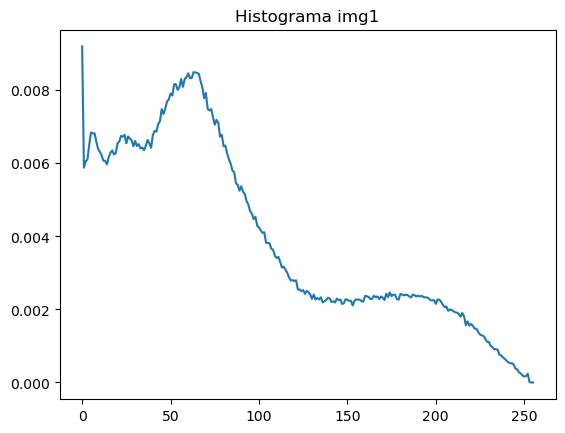

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Histograma img1'),
 None)

In [3]:
# numpy.histogram(a, bins=10, range=None, density=None, weights=None)
h,_=np.histogram(img1,bins=256,range=(0,256),density=True)
plt.figure("Histograma img1"),plt.plot(h),plt.title("Histograma img1"),plt.show()

## 2. Segmentarea pe histograma: binarizarea

Daca histograma are doar doua moduri dominante, separarea acestora (si deci identificarea obiectelor din imagine) se face prin alegerea unui nivel de gri $T$, numit prag de segmentare. Acest prag de segmentare se alege pe minimul global al histogramei. Din imaginea initiala $f$ de niveluri de gri se construieste o imagine de etichete (imagine etichetata) $g$,
conform transformarii descrise de:
$g(m,n)=\left\{{E_{0},0\leq f(m,n)<T \\ E_{1},T\leq f(m,n)<L} \right.$

Imaginea etichetata va fi descrisa de doua etichete: $E_{0}$ pentru punctele al caror nivel de gri este mai mic decat pragul $T$ s $E_{1}$ pentru punctele al caror nivel de gri este mai mare decat pragul $T$. Etichetele $E_{0}$ s $E_{1}$ pot fi
valori numerice (0 si 1, sau 0 si 255) sau pot fi siruri de simboluri sau alti identificatori. Transformarea de binarizare este o transformare punctuala (noua valoare din punctul $(m,n)$ depinde doar de valoarea anterioara din punctul $(m,n)$) si poarta numele de binarizare. Aceasta denumire provine din faptul ca rezultatul transformarii (imaginea etichetata) este o imagine binara - deci o imagine caracterizata doar de doua valori. In cele ce urmeaza vom considera ca etichetele sunt numerice, mai precis numere naturale. Cea mai simpla varianta de binarizare a unei imagini cu niveluri de gri $\texttt{img}$ dupa pragul $T \in (0,255)$ se poate implementa prin compararea valorii fiecarui pixel cu pragul, fie prin implementare vectorizata, fie prin implementare in bucla dubla imbricata for.

Implementarea vectorizata va genera imaginea binara segmentata  𝚘𝚞𝚝
 , care este de tipul  𝚕𝚘𝚐𝚒𝚌
  (atentie la operatiile matematice ce se doresc efectuate eventual asupra unor date de un asemenea tip) si care are doar valori de 0 (acolo unde pixelii imaginii initiale aveau valori mai mici decat pragul  𝑇
 , echivalent etichetei 0) si de 1 (acolo unde pixelii imaginii initiale aveau valori mai mari sau cel putin egale cu pragul  𝑇
 , echivalent etichetei 1). Acelasi rezultat poate fi generat cu aplicarea directa a formulei la nivel de pixel, prin folosirea de doua bucle for imbricate.
 
# Ce vom coda:
citirea unei imagini, constructia histogramei de niveluri de gri a imaginii, afisarea histogramei,alegerea pragului, binarizarea

uint8


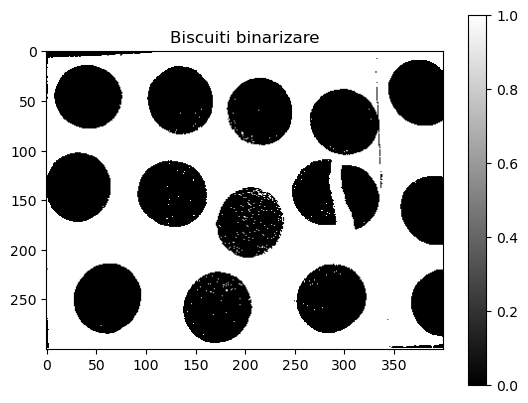

(<Figure size 640x480 with 2 Axes>,
 Text(0.5, 1.0, 'Biscuiti binarizare'),
 None)

In [5]:
###pentru biscuiti img2
#alegerea pragului (ne uitam slidebar din img initiala)
T=80
h2,w2=np.shape(img2)
out=np.uint8(np.zeros([h2,w2]))
for i in range(0,h2):
    for j in range(0,w2):
        if(img2[i,j]<T):
            out[i,j]=0;
        elif(img2[i,j]>=T):
            out[i,j]=1;
        
print(out.dtype)
plt.figure(),plt.imshow(out,cmap="gray"),plt.title("Biscuiti binarizare"),plt.colorbar(),plt.show()


## Segmentarea pe histograma cu mai multe praguri
In cazul general al existentei a mai multe praguri de segmentare $T_{k}$, transformarea de segmentare pe histograma este descrisa de:
$g(m,n)=E_{k},\, daca T_{k}\leq f(m,n)<T_{k+1}$, unde $T_{0}=0$ , $T_{C}=L$ , $k=0,1,...,C-1.$ 
Pragurile $T_{k}$ se aleg prin inspectia histogramei, in minimele locale ale acesteia.

Acest tip de segmentare multinivel este mai putin eficient decat binarizarea, din cauza dificultatii de stabilire a pragurilor care sa izoleze eficient intervalele de interes din histograma, mai ales atunci cand numarul modurilor este mare. Trebuie de asemenea remarcat faptul ca este necesara cunoasterea numarului de tipuri de obiecte din imagine, pentru alegerea corespunzatoare a numarului de praguri de segmentare. 
Putem implementa o asemenea segmentare conform celor de mai jos:

uint8


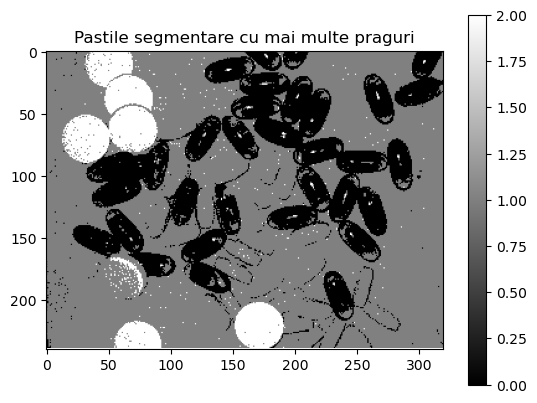

(<Figure size 640x480 with 2 Axes>,
 Text(0.5, 1.0, 'Pastile segmentare cu mai multe praguri'),
 None)

In [6]:
###pentru pastile img3
#alegerea pragurilor (ne uitam pe histograma)
T1=150
T2=200
img3_plan=img3[:,:,1]
h3,w3=np.shape(img3[:,:,1])
out=np.uint8(np.zeros([h3,w3]))
for i in range(0,h3):
    for j in range(0,w3):
        if (img3_plan[i,j]<T1):
            out[i,j]=0
        elif (T1<=img3_plan[i,j]<=T2):
            out[i,j]=1
        elif (img3_plan[i,j]>T2):
            out[i,j]=2

print(out.dtype)
plt.figure(),plt.imshow(out,cmap="gray"),plt.title("Pastile segmentare cu mai multe praguri"),plt.colorbar(),plt.show()


## TEMA: incercati sa generalizati segmentarea de mai sus pentru un numar oarecare de praguri
    Sugestie: folositi un vector de praguri: vector_praguri=np.array([0,T1,T2,......   256])

## 3 Histograma netezita

Histograma reala a imaginii are variatii locale care pot jena tehnicile automate. De multe ori se contstruiesc histograme netezite, in care determinarea automata a pragurilor este mai simpla. Regulile de netezire sunt aceleasi ca si in cazul imaginilor, cu intelegerea faptului ca putem vedea histograma ca un semnal 1-D, pe care se aplica filtrari 1-D. Netezirea se va face cu mediere [aritmetica/ ponderata] sau cu filtrare mediana.

## TEMA: realizarea netezirii histogramei codand filtrarea de netezire liniara si filtrarea mediana fara a folosi functii existente in Python

## TEMA:
Se va adauga zgomot pe imagine, se va urmari efectul pe segmentare
Se va urmari efectul filtrarii de eliminare a zgomotului anterior segmentarii (forma histogramei, rezultat segmentare)

# 4. Histograma cumulativa
Histograma cumulativa este functia de repartitie a variabilei aleatoare ce reprezinta nivelul de gri al imaginii, si deci este probabilitatea ca un pixel din imagine sa aiba nivelul de gri mai mic sau egal ca un prag fixat:
$H(i)=\sum\limits_{a=0}^{i}h(a),\,i=0,1,...L-1 $

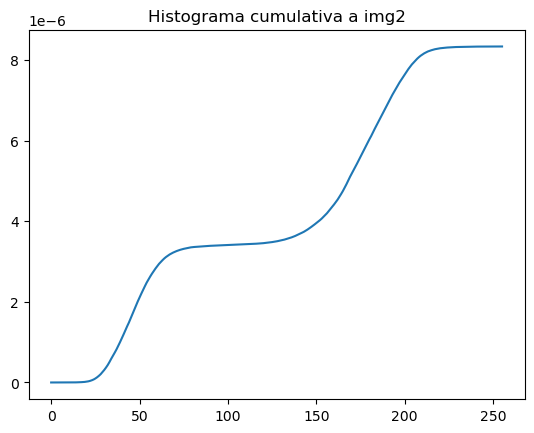

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Histograma cumulativa a img2'),
 None)

In [7]:
#fct pt histograma cumulativa normata
def hist_cum(hist, h, w):

    ## parametrii functiei sunt histograma calculata anterior si dimensiunea imaginii(h,w)
    ## returneaza histograma cumulativa

    #initializeaza hist cumulativa
    H=np.zeros(256)

    #calculam histograma cumulativa folosind histograma imaginii data ca parametru
    #observati ca in histograma cumulativa pe pozitia i gasiti cate nivele de gri(prob de aparitie) sunt mai mici decat i
    # Ex => pe pozitia 200 din hist cumulativa aveti cati pixeli din imagine se regasesc in intervalul intreg [0,200]
    H[0] = hist[0]
    for i in range(1, 256):
        H[i] = H[i-1] + hist[i]

    #returneaza histograma cumulativa normata la dimensiunea imaginii
    return H / (h * w)

H2_cum=hist_cum(H2,h2,w2)
plt.figure(),plt.plot(H2_cum),plt.title("Histograma cumulativa a img2"),plt.show()


## TEMA: putem calcula altfel histograma cumulativa a imaginii (folosind de exemplu functii disponibile in python?)

# 5 Evaluarea calitatii segmentarii
Un mod de masurare a eficientei opertiei de segmentare este de a verifica corectitudinea
deciziei de segmentare la nive de pixel, pentru imagini de test, in care pixelii ce aapartin unei
anumite clase de obiecte sunt cunoscuti (dispunand deci de imagini exemplu pentru o segmentare
ideala). Astfel putem identifica numarul de pixeli de contur corect segmentati (TP,
true positives), precum si cele doua tipuri de erori: ratarea unor pixeli de segmentat
care au fost declarati ca fundal (FN, false negatives) si extragerea unor pixeli
de fundal ca pixeli de obiect (FP, false positives). Evident, acest tip de marimi
se refera la segmentarea unei singure categorii de obiecte din imagine (o singura clasa), tot
restul imaginii fiind considerat fundal; in cazul in care se doreste caracterizarea segmentarii
pentru o imagine ce contine mai multe clase, procesul de exaluare este realizat pentru fiecare
clasa si apoi se considera valorile medii la nivelul intregii imagini.

Masurile de baza (TP, FN, FP) sunt, in mod evident, masuri de tip
absolut; pentru a le transforma in marimi relative vor trebui aplicate normalizari. Cele mai
utilizate marimi normalizate sunt precizia (precision) si reamintirea (recall).
Ambele masuri sunt cuprinse in intervalul $[0; 1]$ si, sunt crescatoare cu calitatea
segmentarii. Preciza exprima procentul de pixeli segmentati care sunt segmentati corect:
$PREC = \frac{TP}{TP + FP}$
Preciza exprima procentul de pixeli segmentati din totalul pixelilor ce ar fi trebuit
segmentati:
$REC = \frac{TP}{TP + FN}$

### ESTE NEVOIE DE O IMAGINE CORECT SEGMENTATA (MASCA) DE REFERINTA!

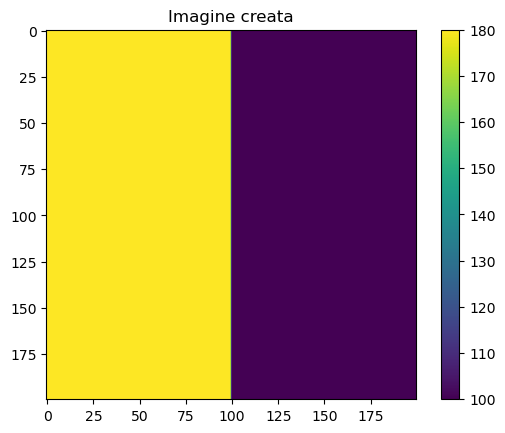

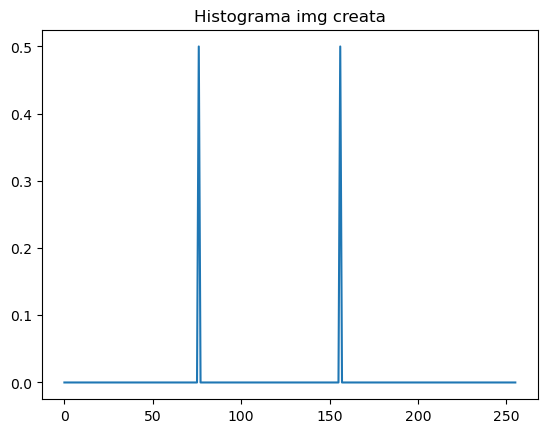

1.4952868099012515 0


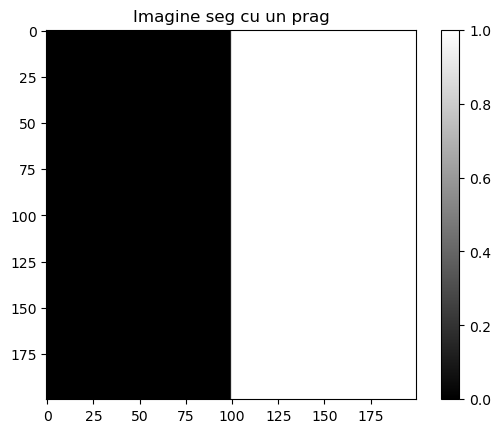

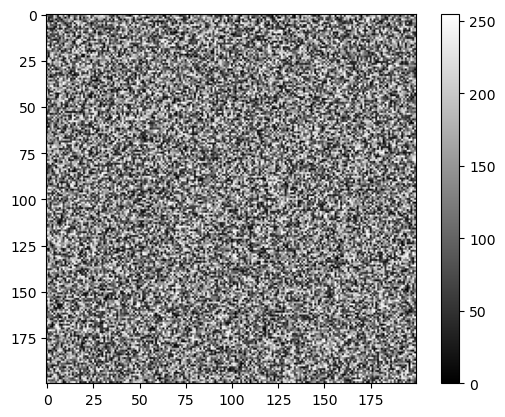

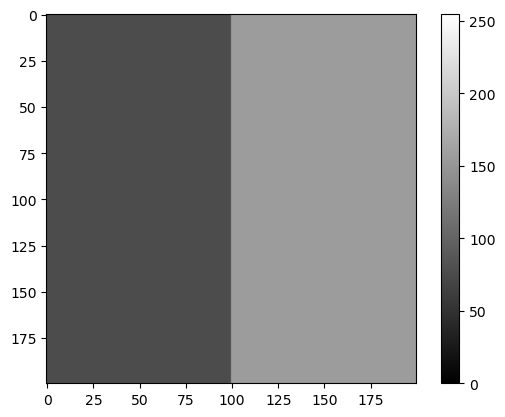

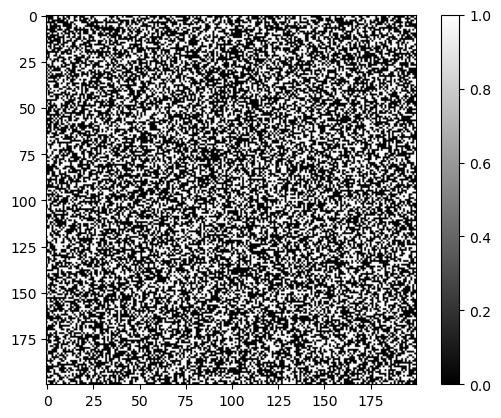

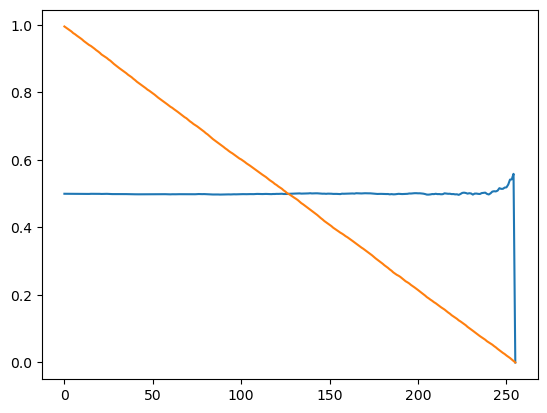

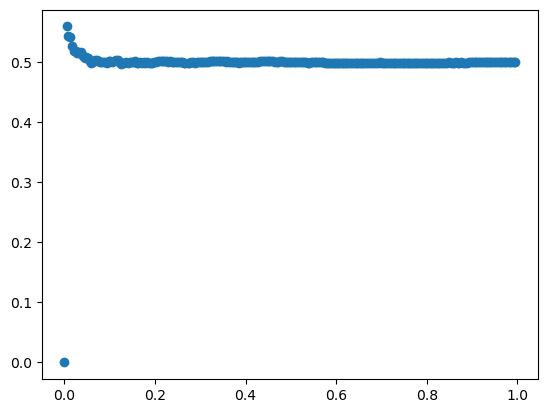

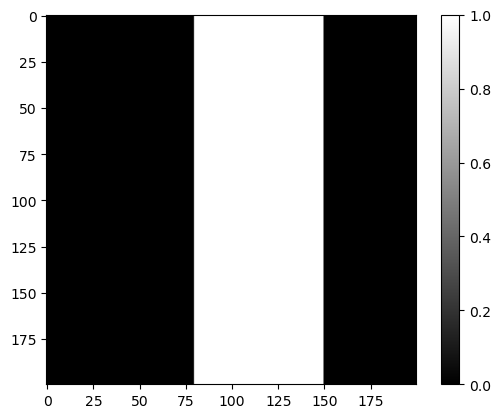

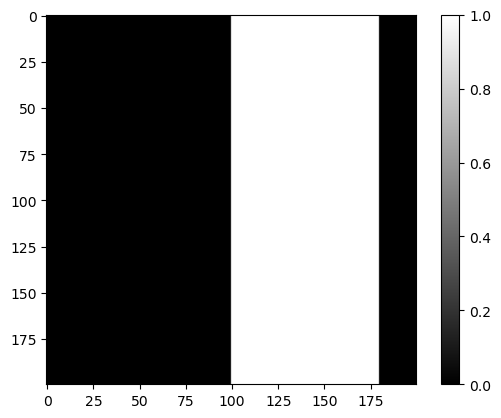

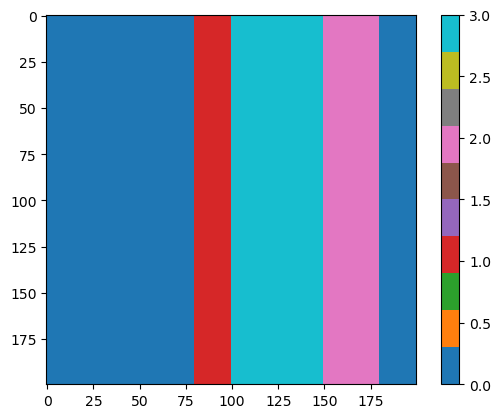

0.624999999609375
0.7142857137755102


In [9]:
#corectitudinea deciziei de segmentare la nive de pixel, pentru imagini de test
#####histograma
def histograma(h,w,img):
    hist=np.zeros(256)
    for i in range(h):
        for j in range(w):
            hist[img[i,j]]+=1    
    return hist/(h*w)

#cream o imagine color 
H,W=200,200
img_pattrat = np.zeros([H,W])+180
img_pattrat[:,100:]=100
plt.figure(),plt.imshow(img_pattrat),plt.title("Imagine creata"),plt.colorbar(),plt.show()
# img_pattrat[H//2-H//6:H//2+H//6,W//2-W//6:W//2+W//6]=180
img_pattrat=np.uint8(img_pattrat*255)     #transformare din float in uint8
H,W=np.shape(img_pattrat)
h1=histograma(H,W,img_pattrat)
plt.figure(),plt.plot(h1),plt.title("Histograma img creata"),plt.show()

# T=gaseste_min_hist(h1)
T=140     #pe slidebar - jumatate
img_seg2=np.zeros([H,W])
img_seg2[img_pattrat>T]=1
plt.figure(),plt.imshow(img_seg2,cmap='gray'),plt.title("Imagine seg cu un prag"),plt.colorbar()

N = np.random.normal(0,16,(H,W))
img_noise=img_pattrat+N
img_noise=np.uint8(img_noise*255) 
H,W=np.shape(img_noise)
h2=histograma(H,W,img_noise)
plt.figure(),plt.imshow(img_noise,cmap='gray'),plt.colorbar()
plt.figure(),plt.imshow(img_pattrat,cmap='gray',vmin=0,vmax=255),plt.colorbar()

# T2=gaseste_min_hist(h2)
T2=140
img_seg=np.zeros([H,W])
img_seg[img_noise>T2]=1
plt.figure(),plt.imshow(img_seg,cmap='gray'),plt.colorbar()

my_prec=[]
my_rec=[]
epsilon=0.00001
maxim=0
thr=0

for t in range(256):
    
    img_seg=np.zeros([H,W])
    img_seg[img_noise>t]=1
    TP=img_seg*img_seg2
    FP=img_seg*(1-img_seg2)
    FN=(1-img_seg)*img_seg2
    prec=np.sum(TP)/(np.sum(TP)+np.sum(FP)+epsilon)
    rec=np.sum(TP)/(np.sum(TP)+np.sum(FN)+epsilon)
    my_prec.append(prec)
    my_rec.append(rec)
    if (prec+rec)> maxim:
        maxim=prec+rec
        thr=t

print(maxim,thr)    

#print(my_rec)
plt.figure(),plt.plot(my_prec),plt.plot(my_rec)
#print(my_prec)
plt.figure(),plt.scatter(my_rec,my_prec)

####################### PRECIZIE SI RECALL ###################
def PrecRec(MASK,SEGM):#mask -> masca, segm -> segmentarea facuta
    epsilon=0.00001
    TP=SEGM*MASK
    FP=SEGM*(1-MASK)
    FN=(1-SEGM)*MASK
    prec=np.sum(TP)/(np.sum(TP)+np.sum(FP)+epsilon) #cat % s-a segmentat corect
    rec=np.sum(TP)/(np.sum(TP)+np.sum(FN)+epsilon) # cat % s-a segmentat din corect
    return prec,rec

MASK = np.zeros([200,200])
MASK[:,80:150]=1
plt.figure(),plt.imshow(MASK,cmap='gray'),plt.colorbar(),plt.show()
SEGM = np.zeros([200,200])
SEGM[:,100:180]=1
plt.figure(),plt.imshow(SEGM,cmap='gray'),plt.colorbar(),plt.show()
plt.figure(),plt.imshow((MASK+2*SEGM),cmap='tab10',interpolation='none'),plt.colorbar(),plt.show()
prec,rec = PrecRec(MASK,SEGM)
print(prec)
print(rec)



## TEMA

Construiti functii care sa calculeze precizia, reamintirea, F1, IOU, Acc

Construiti o imagine de test ce contine un patrat cu nivel de gri constant pe un fundal uniform. Variati nivelurile de gri ale patratului si fundalului. Adaugati zgomot gaussian cu diferite puteri. Verificati precizia si reamintirea pentru variatia pragului de segmentare, in functie de parametrii variati (putere zgomot, nivele de gri). Verificati variatia acuratetii.

Scrieti o functie care sa genereze o imagine de test (imagine cu niveluri de gri si masca ideala de segmentare), apelata cu parametrii de particularizare a imaginii si zgomotului.